# **Recommendation System**

**Data Preprocessing:**

In [1]:
import pandas as pd
from pandas import*

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import*

In [3]:
from google.colab import files
uploaded=files.upload()

Saving anime.csv to anime.csv


In [4]:
data=read_csv('anime.csv')
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
#Checking for missing values
data.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [7]:
#Droping the null values
df1=data.dropna()

In [8]:
df1.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


In [9]:
#Checking for duplicate values
df1.duplicated().sum()

0

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 751.1+ KB


In [11]:
df1.describe()

,anime_id,rating,members
count,12017.000000,12017.000000,1.201700e+04
mean,13638.001165,6.478264,1.834888e+04
std,11231.076675,1.023857,5.537250e+04
min,1.000000,1.670000,1.200000e+01
25%,3391.000000,5.890000,2.250000e+02
50%,9959.000000,6.570000,1.552000e+03
75%,23729.000000,7.180000,9.588000e+03
max,34519.000000,10.000000,1.013917e+06


In [12]:
df1.nunique()

,0
anime_id,12017
name,12015
genre,3229
type,6
episodes,187
rating,598
members,6596


In [13]:
df1['genre'].value_counts()

,count
genre,
Hentai,816
Comedy,521
Music,297
Kids,197
"Comedy, Slice of Life",174
...,...
"Adventure, Comedy, Horror, Shounen, Supernatural",1
"Comedy, Harem, Romance, School, Seinen, Slice of Life",1
"Comedy, Ecchi, Sci-Fi, Shounen",1


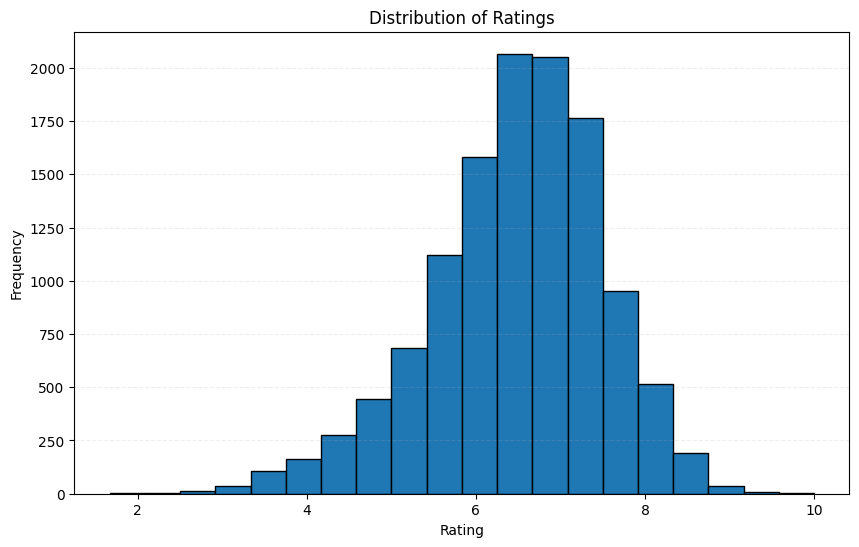

In [14]:
figure(figsize=(10,6))
hist(df1['rating'],bins=20,edgecolor='black')
title('Distribution of Ratings')
xlabel('Rating')
ylabel('Frequency')
grid(axis='y',alpha=0.2,linestyle='--')
show()

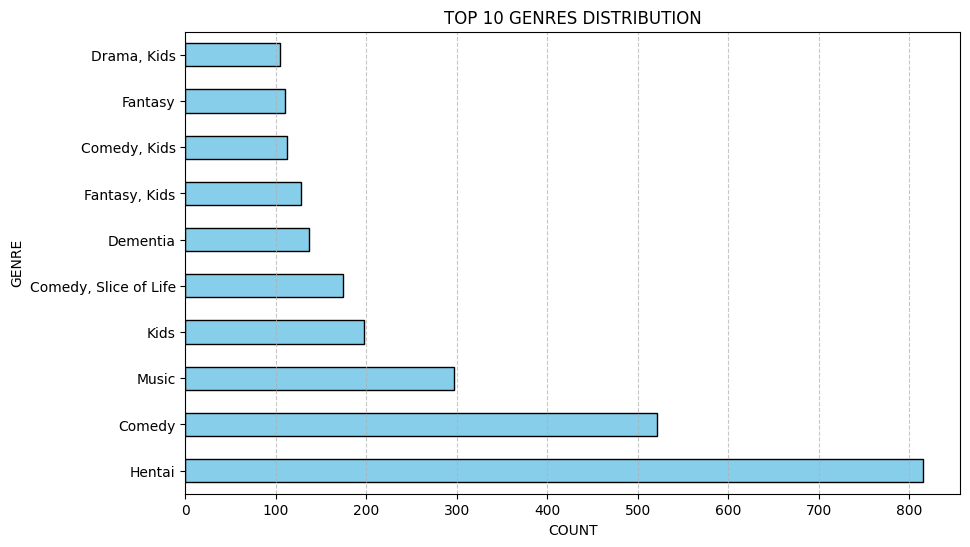

In [15]:
top_genres=df1['genre'].value_counts().head(10)
figure(figsize=(10,6))
top_genres.plot(kind='barh',color='skyblue',edgecolor='black')
title('TOP 10 GENRES DISTRIBUTION')
xlabel('COUNT')
ylabel('GENRE')
grid(axis='x',linestyle='--',alpha=0.7)
show()

**Feature Extraction:**

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
genres=df1['genre'].str.get_dummies(sep=', ')
df_numeric=concat([df1.drop('genre',axis=1),genres],axis=1)

In [18]:
#standardization
scaler=StandardScaler()
numerical_cols=['rating','members']
df_numeric[numerical_cols]=scaler.fit_transform(df_numeric[numerical_cols])
df_numeric.head()

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,Movie,1,2.824474,3.292044,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,2.717032,14.002410,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51,2.707265,1.732216,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24,2.629126,11.833499,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,TV,51,2.619358,2.400518,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


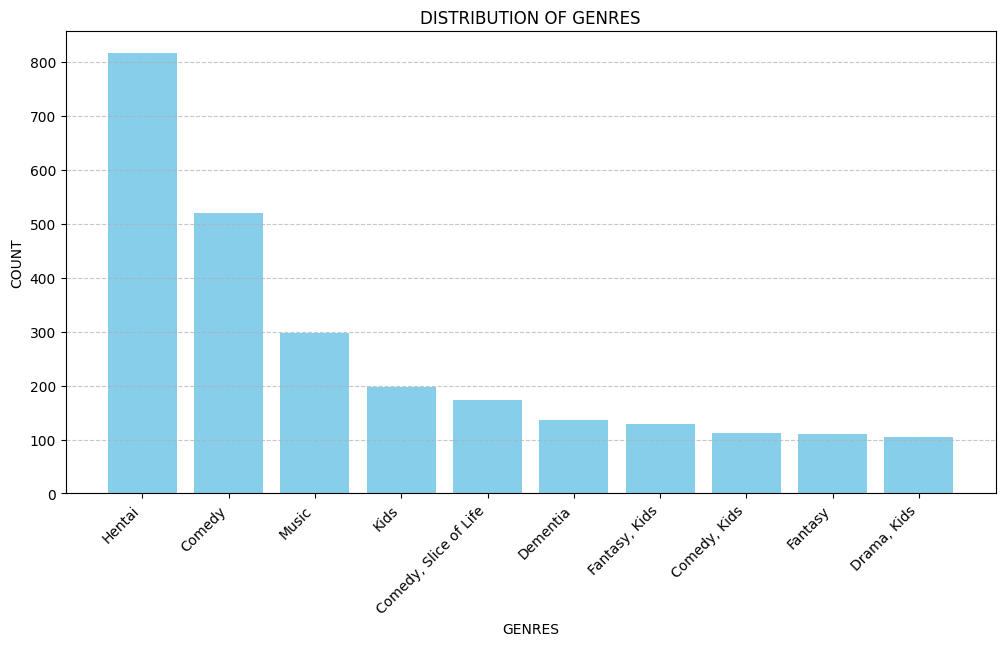

In [19]:
genre_counts=df1['genre'].value_counts().head(10)
figure(figsize=(12,6))
bar(genre_counts.index,genre_counts.values,color='skyblue')
title('DISTRIBUTION OF GENRES')
xlabel('GENRES')
ylabel('COUNT')
xticks(rotation=45,ha='right')
grid(axis='y',linestyle='--',alpha=0.7)
show()

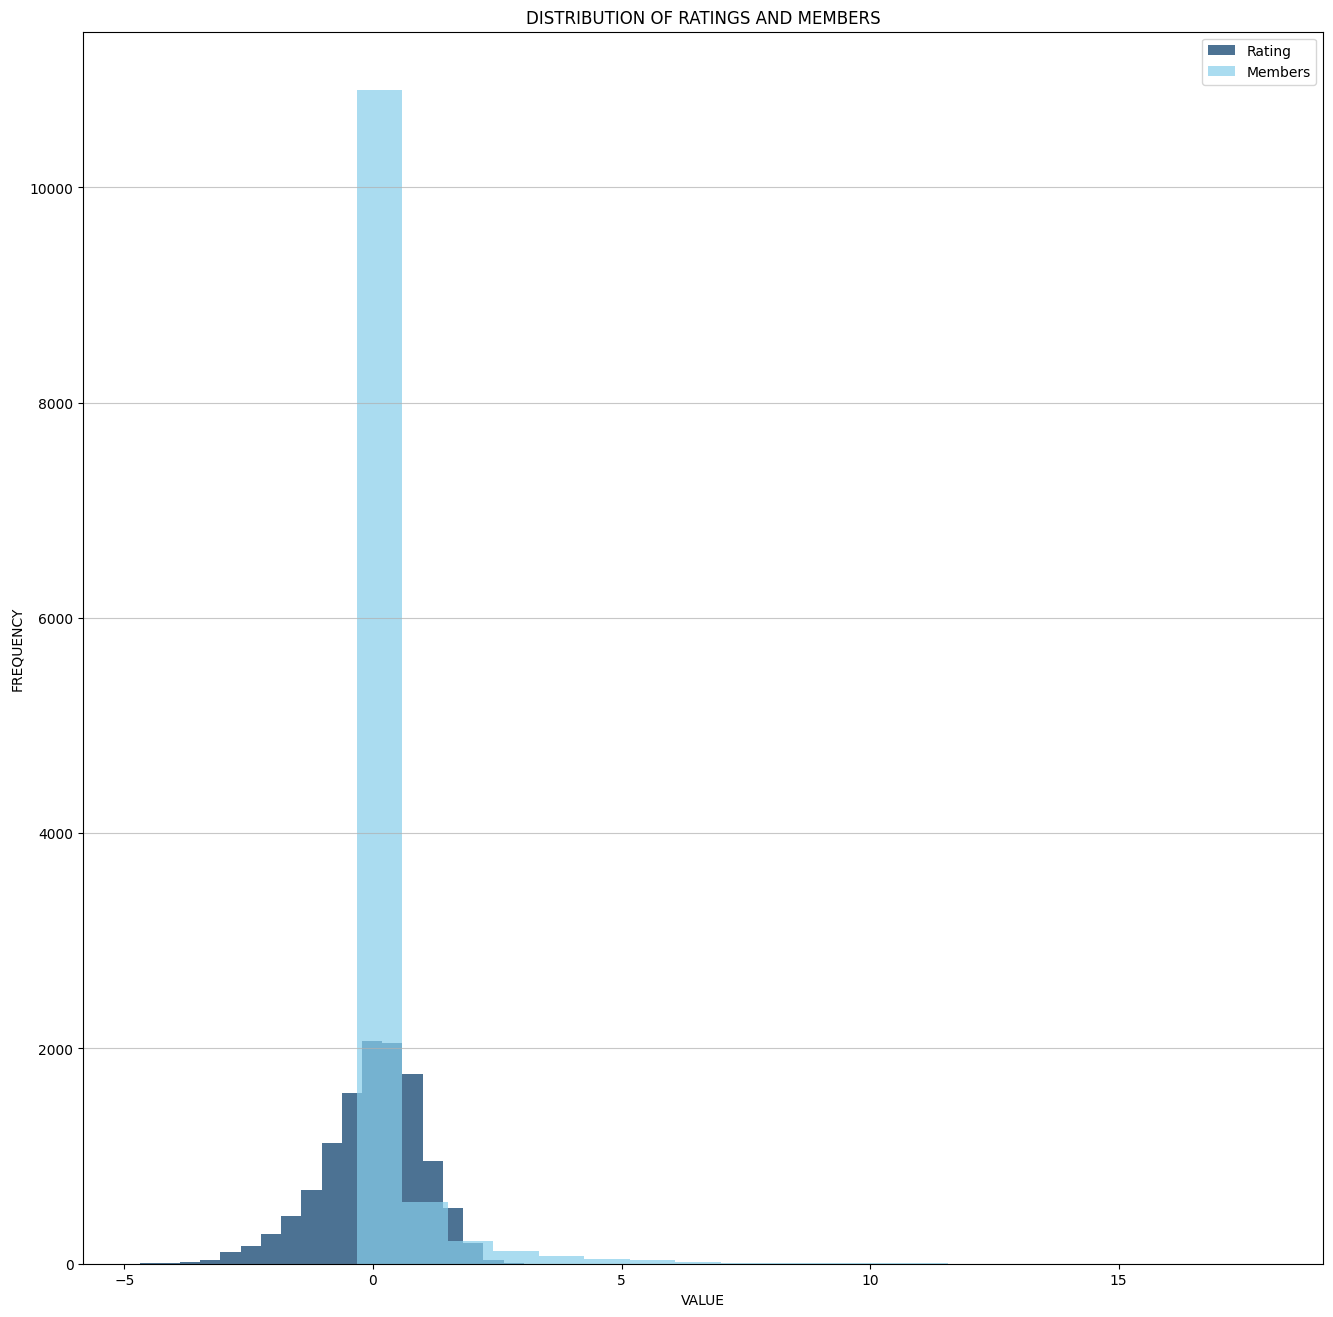

In [20]:
figure(figsize=(16,16))
#Distribution of ratings
hist(df_numeric['rating'],bins=20,color='#003666',alpha=0.7,label='Rating')
#Distribution of members
hist(df_numeric['members'],bins=20,color='skyblue',alpha=0.7,label='Members')
title('DISTRIBUTION OF RATINGS AND MEMBERS')
xlabel('VALUE')
ylabel('FREQUENCY')
legend()
grid(axis='y',alpha=0.7)
show()


**Recommendation System:**


In [21]:
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
import numpy as np
from numpy import*

In [23]:
def recomend_similar_anime(df,target_anime,threshold=0.5):
  df['episodes']=to_numeric(df['episodes'],errors='coerce')
  df=df.dropna(subset=['episodes'])
  #Extract features for similarity computation
  features=df.drop(['name','type'],axis=1)
  #Find the target anime's features
  target_row=features[df['name']==target_anime]
  if target_row.empty:
    return f"Anime '{target_anime}' not found in the dataset."
  similarities=cosine_similarity(target_row,features).flatten()
  similar_indices=where((similarities>threshold)&(df['name']!=target_anime))[0]
  recomended_anime=df.iloc[similar_indices]['name'].tolist()
  return recomended_anime



In [24]:
recommendations=recomend_similar_anime(df_numeric,'Nana',threshold=0.5)
recommendations_series=Series(recommendations)
top_5_recommendations=recommendations_series.value_counts().head(5)
print(top_5_recommendations)

Saru Kani Gassen           2
Shi Wan Ge Leng Xiaohua    2
Kimi no Na wa.             1
Rebirth Moon Divergence    1
Idol Fight Suchie-Pai 2    1
Name: count, dtype: int64


**Evaluation:**

In [38]:
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler

In [26]:
df_numeric['liked']=((df_numeric['rating']>=1)).astype(int)
df_numeric.head()

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,liked
0,32281,Kimi no Na wa.,Movie,1.0,2.824474,3.292044,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,5114,Fullmetal Alchemist: Brotherhood,TV,64.0,2.717032,14.002410,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28977,Gintama°,TV,51.0,2.707265,1.732216,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,9253,Steins;Gate,TV,24.0,2.629126,11.833499,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,9969,Gintama&#039;,TV,51.0,2.619358,2.400518,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [27]:
df_numeric.isnull().sum()

,0
anime_id,0
name,0
type,0
episodes,187
rating,0
members,0
Action,0
Adventure,0
Cars,0
Comedy,0


In [28]:
df1=df_numeric.dropna()

In [29]:
df1.isnull().sum()

,0
anime_id,0
name,0
type,0
episodes,0
rating,0
members,0
Action,0
Adventure,0
Cars,0
Comedy,0


In [30]:
df1.describe()

,anime_id,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,liked
count,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,...,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000
mean,13404.150211,12.486729,0.006197,0.002928,0.232291,0.193829,0.006002,0.378952,0.020118,0.024260,...,0.099746,0.031784,0.044548,0.037616,0.083939,0.007270,0.008453,0.003128,0.003466,0.142604
std,11110.087616,47.097131,0.995442,1.000023,0.422311,0.395313,0.077241,0.485147,0.140411,0.153863,...,0.299674,0.175431,0.206317,0.190274,0.277308,0.084955,0.091555,0.055840,0.058771,0.349683
min,1.000000,1.000000,-4.696423,-0.331169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3326.250000,1.000000,-0.572139,-0.327191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9820.500000,2.000000,0.089602,-0.302679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23302.500000,12.000000,0.695181,-0.153817,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,34519.000000,1818.000000,3.439820,17.980218,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
print(df1['liked'].value_counts())

liked
0    10143
1     1687
Name: count, dtype: int64


In [35]:
#Splitting data into training and testing
x=df1.drop(['name','type','anime_id'],axis=1)
y=df1['liked']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(x_train,y_train)
print('Shape Of X_Train :',x_train.shape)
print('Shape Of X_Test :',x_test.shape)
print('Shape Of Y_Train :',y_train.shape)
print('Shape Of Y_Test :',y_test.shape)

Shape Of X_Train : (9464, 47)
Shape Of X_Test : (2366, 47)
Shape Of Y_Train : (9464,)
Shape Of Y_Test : (2366,)


In [37]:
y_pred=model.predict(x_test)
#Calculating accuracy
accuracy=accuracy_score(y_test,y_pred)
print('ACCURACY :',accuracy)

ACCURACY : 1.0


In [39]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

model=LogisticRegression()
model.fit(x_train_scaled,y_train)

y_pred=model.predict(x_test_scaled)

precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print('PRECISION :',precision)
print("RECALL :",recall)
print('F1-SCORE :',f1)

PRECISION : 1.0
RECALL : 1.0
F1-SCORE : 1.0


**Interview Questions:**

1. Can you explain the difference between user-based and item-based collaborative filtering?

•	**User-Based Collaborative Filtering** : User-based collaborative filtering makes recommendations by finding users similar to the target user and recommending items that those similar users .

•	**Item-Based Collaborative Filtering** : Item-based collaborative filtering makes recommendations by finding items similar to the ones the target user has interacted with and recommending those similar items .

2. What is collaborative filtering, and how does it work?

**Collaborative Filtering** is a technique used in recommendation systems to predict a user's preferences based on the preferences of other users. The core idea is that user's who have agreed in the past will agree in the future, and items that have similar appeal to user's will continue to have similar appeal .